In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

# Get data

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/home/quantran/.fastai/data/imdb_sample/texts.csv')]

In [ ]:
df = pd.read_csv(path/'texts.csv')

In [11]:
df.tail()

,label,text,is_valid
995,negative,There are many different versions of this one ...,True
996,positive,Once upon a time Hollywood produced live-actio...,True
997,negative,Wenders was great with Million $ Hotel.I don't...,True
998,negative,Although a film with Bruce Willis is always wo...,True
999,positive,"A compelling, honest, daring, and unforgettabl...",True


In [8]:
df.loc[0,'text']

"Un-bleeping-believable! Meg Ryan doesn't even look her usual pert lovable self in this, which normally makes me forgive her shallow ticky acting schtick. Hard to believe she was the producer on this dog. Plus Kevin Kline: what kind of suicide trip has his career been on? Whoosh... Banzai!!! Finally this was directed by the guy who did Big Chill? Must be a replay of Jonestown - hollywood style. Wooofff!"

In [9]:
df.shape

(1000, 3)

In [10]:
df.is_valid.value_counts()

False    800
True     200
Name: is_valid, dtype: int64

# Databunch

Convert text to numbers by 1: tokenization and 2: numericalization

In [12]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

Save data

In [14]:
# data_lm.save()

In [15]:
data = TextDataBunch.load(path)

In [16]:
data

TextClasDataBunch;

Train: LabelList
y: CategoryList (799 items)
[Category negative, Category negative, Category negative, Category negative, Category positive]...
Path: .
x: TextList (799 items)
[Text xxbos " xxmaj xxunk " is quite possibly the most incompetent , embarrassing , pitiful " film " i have ever seen . xxmaj the acting is criminal , the direction practically non - existent , and the special effects presumably put together by xxunk a xxunk with learning difficulties on a xxunk laptop computer . 

 xxmaj far be it from me to xxunk creativity , but i actually believe things like this should n't be made . i am sure the " film "- makers will say that , yes , the " film " was xxunk by a low ( as in nothing ) budget - but in that case they just really should n't have bothered . xxmaj as it is , they have xxunk the world something so dire , so xxunk , that only xxunk could get the xxunk xxunk of enjoyment from it . 

 xxmaj starting the " movie " it was n't as though i was expectin

## Tokenization

Splitting words by: taking care of punctuation, word contraction (isn't) and word cleaning

sometimes if it's like an 's from it's, it will get its own token. Every bit of punctuation tends to get its own token (a comma, a full stop, and so forth).

In [17]:
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n\n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj victor xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n\n xxmaj it 's usually satisfying to watch a film director change his style / subject ,",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n\n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj xxunk , """,positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk xxunk experience in general . xxmaj with graphics",positive


Original text for review #3

Now that Che(2008) has finished its relatively short Australian cinema run (extremely limited release:1 screen in Sydney, after 6wks), I can guiltlessly join both hosts of "At The Movies" in taking Steven Soderbergh to task. 

It's usually satisfying to watch a film director change his style/subject, but Soderbergh's most recent stinker, The Girlfriend Experience(2009), was also missing a story, so narrative (and editing?) seem to suddenly be Soderbergh's main challenge. Strange, after 20-odd years in the business. He was probably never much good at narrative, just hid it well inside "edgy" projects. 

There are several special token that begins with 'xx', e.g: 'xxbos' for start of reviews, 'xxmaj' for capitalization ... 

## Numericalization

Convert tokens to integers. Keep only tokens that appear at list twice with max vocab size of 60k

Replace any token that doesn't match the requirements with UNK token

In [21]:
data.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 '.',
 ',',
 'and',
 'a',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i',
 'that']

In [22]:
data.train_ds[0][0]

Text xxbos " xxmaj xxunk " is quite possibly the most incompetent , embarrassing , pitiful " film " i have ever seen . xxmaj the acting is criminal , the direction practically non - existent , and the special effects presumably put together by xxunk a xxunk with learning difficulties on a xxunk laptop computer . 

 xxmaj far be it from me to xxunk creativity , but i actually believe things like this should n't be made . i am sure the " film "- makers will say that , yes , the " film " was xxunk by a low ( as in nothing ) budget - but in that case they just really should n't have bothered . xxmaj as it is , they have xxunk the world something so dire , so xxunk , that only xxunk could get the xxunk xxunk of enjoyment from it . 

 xxmaj starting the " movie " it was n't as though i was expecting " xxmaj citizen xxmaj kane " or anything . i was expecting a low budget little horror with perhaps a xxunk of xxunk , a hint of fun , and even some energy . xxmaj what i got was the cinematic xxu

In [23]:
type(data.train_ds[0][0])

fastai.text.data.Text

In [24]:
data.train_ds[0][0].data[:10]

array([  2,  21,   4,   0,  21,  15, 177, 860,   8, 109])

# Datablock API: more comprehensive

we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the variaous arguments to pass will appear in the step they're revelant, so it'll be more readable.

In [25]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [26]:
data.train_ds[0][0]

Text xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !

# Language model on full dataset

Dataset

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning.

In [3]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/quantran/.fastai/data/imdb/README'),
 PosixPath('/home/quantran/.fastai/data/imdb/train'),
 PosixPath('/home/quantran/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/quantran/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/quantran/.fastai/data/imdb/models'),
 PosixPath('/home/quantran/.fastai/data/imdb/unsup'),
 PosixPath('/home/quantran/.fastai/data/imdb/test'),
 PosixPath('/home/quantran/.fastai/data/imdb/imdb.vocab')]

In [30]:
(path/'train').ls()

[PosixPath('/home/quantran/.fastai/data/imdb/train/neg'),
 PosixPath('/home/quantran/.fastai/data/imdb/train/pos'),
 PosixPath('/home/quantran/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/home/quantran/.fastai/data/imdb/train/unsupBow.feat')]

## fine-tune Wiki pretrained model to our particular dataset.

In [31]:

data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('tmp_lm')

We concatenate the training and test set together and randomly splitting it by 10%

Since training language model is **self supervised learning**: classic supervised model﹣we have labels, but the labels are not things that somebody else have created. They're built into the dataset itself

In [9]:
bs=80

In [10]:
data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

In [33]:
data_lm.show_batch()

idx,text
0,"xxmaj the thing is i knew this before starting to watch . xxmaj but , despite this , i was still looking forward to it . xxmaj in the right hands , with a good cast and a bright script it can still be a pleasant way to pass a couple of hours . \n\n this was none of these . \n\n this was dire . \n\n a female lead"
1,"as he suffers through the bad dialogue . \n\n xxmaj also , i think the previous commenter giving this movie an 8 out of 10 was probably either involved in the movie somehow or hired by xxmaj papa xxmaj joe to give the movie a better rating . xxmaj no one in their right mind would actually find this movie engaging . \n\n xxmaj jessica has lots of money ,"
2,", the xxunk mannered wife who just ca n't take it anymore ( but eventually moves beyond the discord and resignedly comes home ) , the herd of xxunk dogs who like to chew throw pillows while everyone is away , etc . \n\n xxmaj god , what a snore . i 've never been a xxmaj diane xxmaj keaton fan and xxmaj smother only reminded me why . xxmaj"
3,"as xxmaj bradbury must have been forced to keep the violence to a minimum . xxmaj all the visuals from the book ... gone . xxmaj everything that made you squirm ... gone . \n\n xxmaj and then there 's the acting . xxmaj like a lot of movies that xxmaj disney threw out in the 80s , the kids in this movie can not act . xxmaj and ,"
4,"aag with sholay , still u will not like it . \n\n xxmaj if you dare watch this movie . xxmaj you will be burnt alive in xxup ramgopal xxup varma xxup ki xxup aag xxbos xxmaj this is indeed a god adaptation of xxmaj jane xxmaj austen 's novel . xxmaj compared with the xxmaj american xxmaj version with xxmaj xxunk xxmaj paltrow , the script was written to"


## train language model

Specify drop_mult (dropout) to be 0.3. High drop_mult = high regularization, however model is underfitting -> reduce drop_mult

In [11]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [12]:
learn = learn.to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


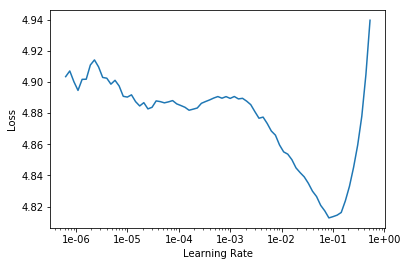

In [13]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

TODO: explaining moms

In [15]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.111014,3.980875,0.296776


In [16]:
# learn.save('fit_head')

In [13]:
import gc
del data_lm
del learn
gc.collect()

56

In [14]:
bs=75

data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

In [15]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

learn = learn.to_fp16()

In [16]:
learn.load('fit_head');

In [17]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy


In [ ]:
learn.save_encoder('fine_tuned_enc')